In [ ]:
%pip install nltk
%pip install emoji
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install Counter

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import ast 
import nltk 

# Configuración 

In [4]:
ruta_base = os.path.dirname(os.getcwd())
input_folder = 'data_processed' 
input_filename = 'fifa_tweets_clean.csv' 
input_csv_file = os.path.join(ruta_base,input_folder, input_filename)

# Cargar las stopwords si es necesario (para calcular longitud de tokens) 

In [5]:
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except (nltk.downloader.DownloadError, LookupError):
    print("Recursos de NLTK ('punkt', 'stopwords') no encontrados. Descargando...")
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)

Cargando dataset procesado desde 'c:\Users\oscar\Documents\Semestre6\discretas\ti2-2025-1-lora_team\data_processed\fifa_tweets_clean.csv' para EDA...
Dataset procesado cargado exitosamente.
Número de filas cargadas: 22524
Columnas disponibles: ['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweet', 'Sentiment', 'test_clean', 'hastag', 'emojis', 'processed_tokens']

--- Iniciando Análisis Exploratorio de Datos (EDA) ---

Distribución de Sentimientos:
Sentiment
positive    8489
neutral     8251
negative    5784
Name: count, dtype: int64


C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3461139087.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=sentiment_counts.index, palette='viridis')


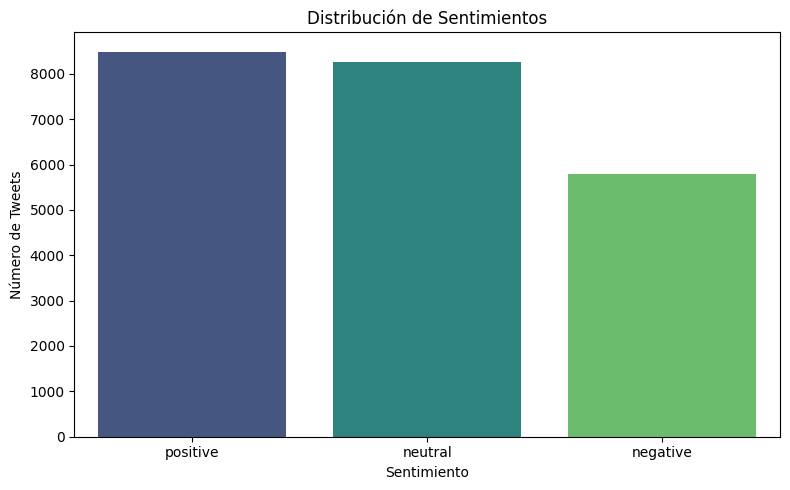


Análisis de Longitud de Tweets:


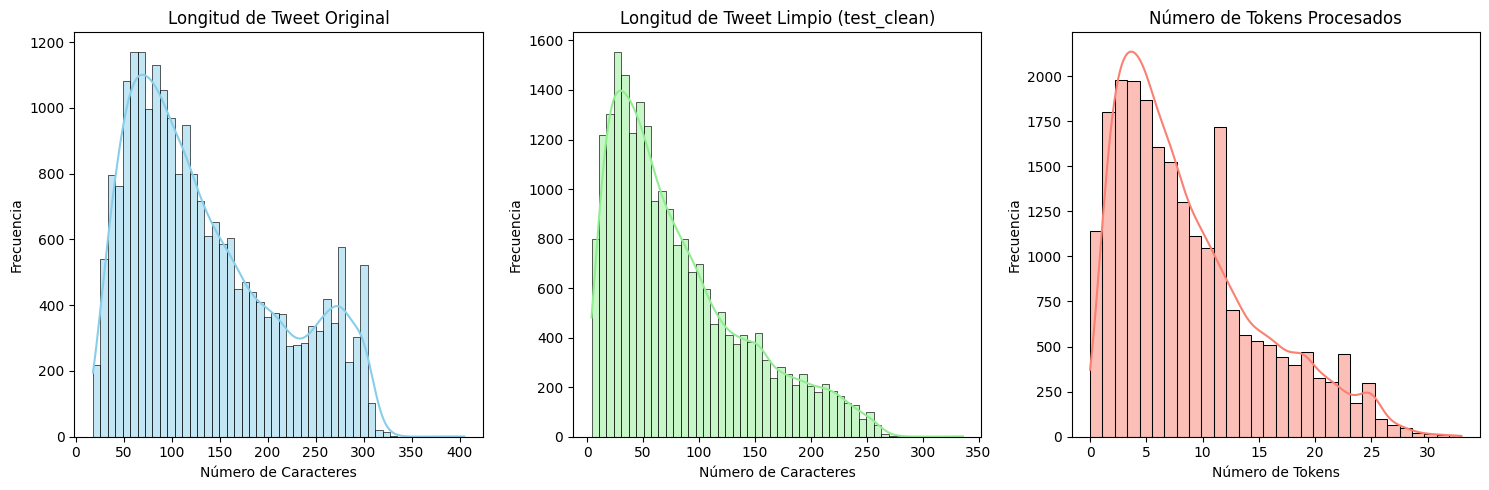


Palabras más comunes (después del preprocesamiento):


C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3461139087.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


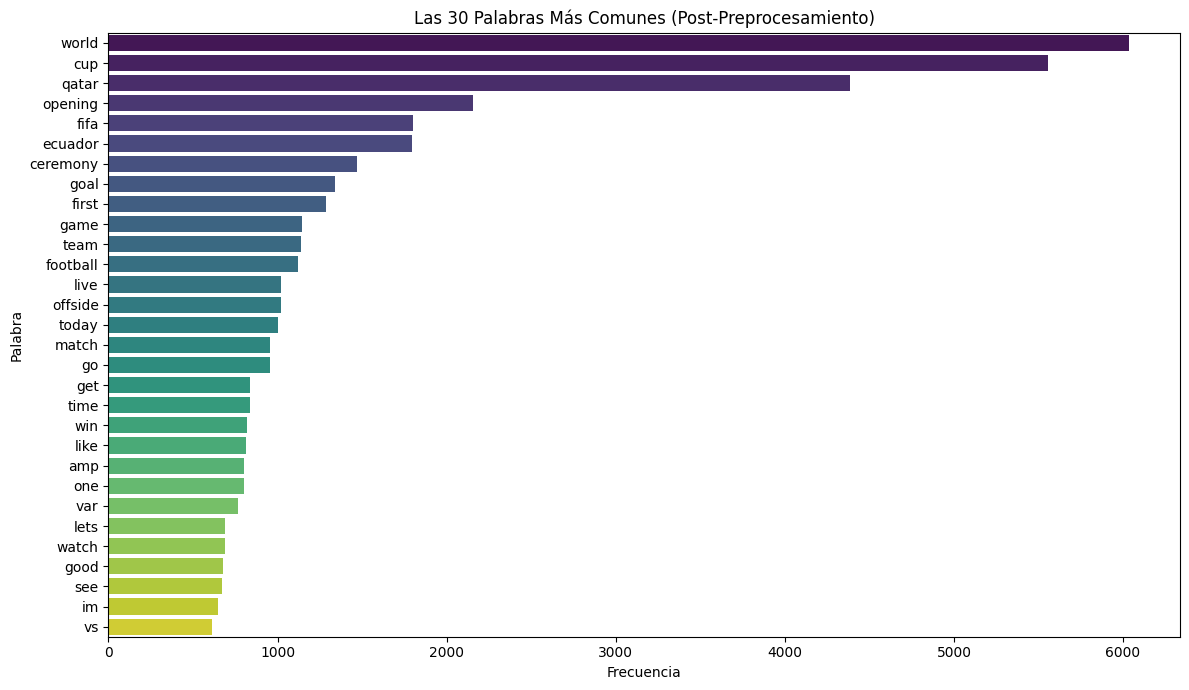


Hashtags más comunes:


C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3461139087.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ht_counts), y=list(hashtags), palette='viridis')


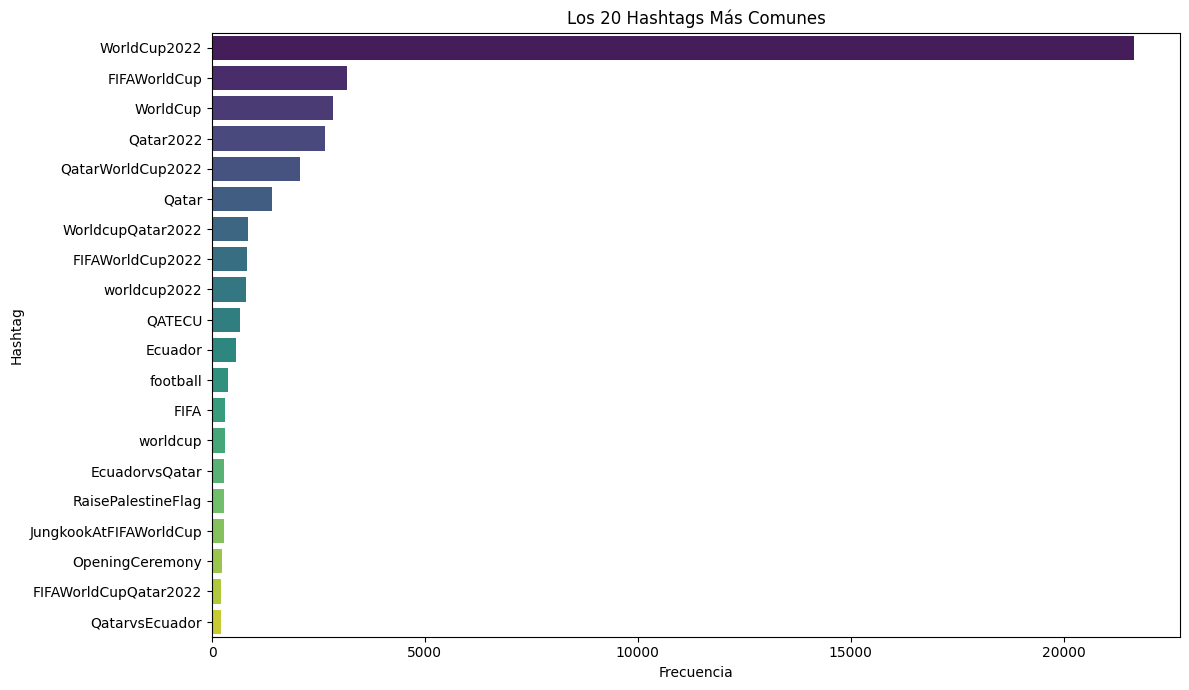


Emojis más comunes:


C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3461139087.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(emo_counts), y=list(emojis), palette='viridis')


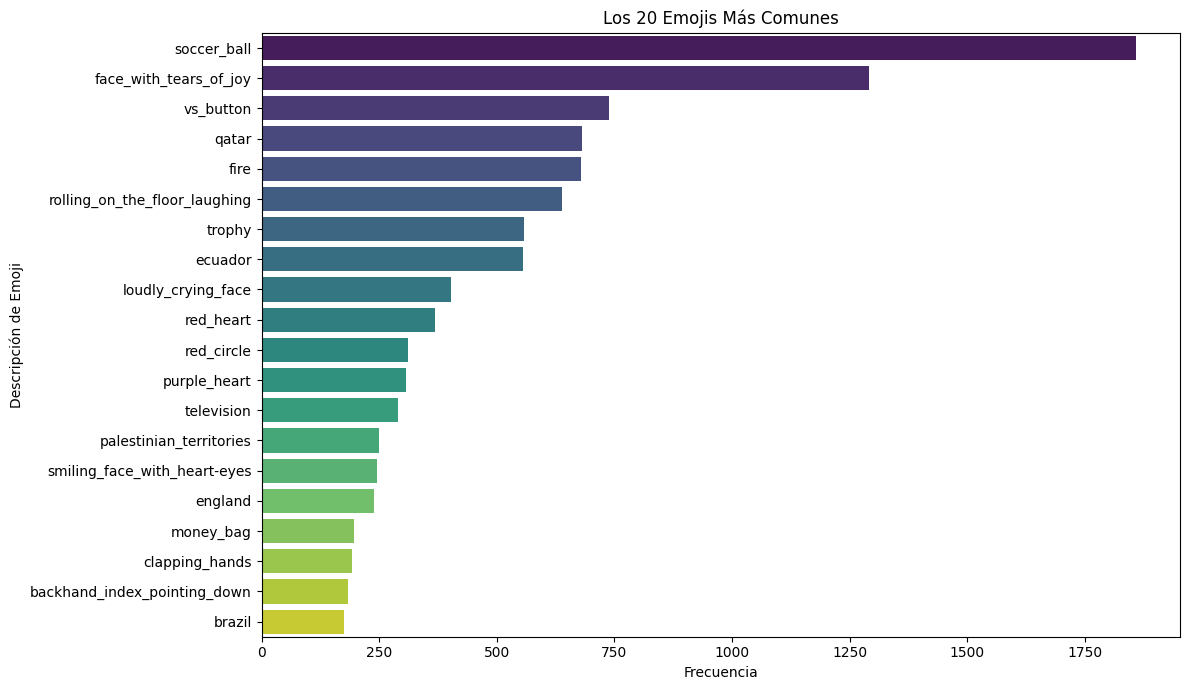

In [6]:
# --- Cargar el dataset procesado ---
print(f"Cargando dataset procesado desde '{input_csv_file}' para EDA...")
try:
    df = pd.read_csv(
        input_csv_file,
        encoding='utf-8',
        converters={
            'hastag': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [],
            'emojis': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [],
            'processed_tokens': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else []
        }
    )

    print("Dataset procesado cargado exitosamente.")
    print(f"Número de filas cargadas: {len(df)}")
    print(f"Columnas disponibles: {df.columns.tolist()}")

except FileNotFoundError:
    print(f"Error: El archivo procesado '{input_csv_file}' no fue encontrado.")
    print("Asegúrate de que el script de preprocesamiento se ejecutó correctamente y generó este archivo en la carpeta 'processed_data'.")
    sys.exit(1)
except Exception as e:
    print(f"Error al cargar el archivo procesado: {e}")
    print("Asegúrate de que el archivo no esté corrupto y que las columnas de lista estén bien formadas.")
    sys.exit(1)

# --- Verificaciones básicas ---
if 'Sentiment' not in df.columns:
    print("Error: La columna 'Sentiment' no se encuentra en el dataset.")
    sys.exit(1)
if 'Tweet' not in df.columns:
     print("Advertencia: La columna 'Tweet' (original) no se encuentra. Algunos análisis de longitud pueden verse afectados.")
if 'test_clean' not in df.columns:
     print("Advertencia: La columna 'test_clean' no se encuentra. Algunos análisis de longitud y tokenización pueden verse afectados.")
if 'processed_tokens' not in df.columns:
     print("Error: La columna 'processed_tokens' no se encuentra. El análisis de palabras comunes no es posible.")
     sys.exit(1) 

print("\n--- Iniciando Análisis Exploratorio de Datos (EDA) ---")

print("\nDistribución de Sentimientos:")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', order=sentiment_counts.index, palette='viridis')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Tweets')
plt.tight_layout()
plt.show()


print("\nAnálisis de Longitud de Tweets:")
df['original_length'] = df['Tweet'].astype(str).apply(len) if 'Tweet' in df.columns else pd.NA
df['clean_length'] = df['test_clean'].astype(str).apply(len) if 'test_clean' in df.columns else pd.NA
df['token_count'] = df['processed_tokens'].apply(len) # Esto siempre debería existir si processed_tokens se cargó

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

if 'original_length' in df.columns and not df['original_length'].isna().all():
    sns.histplot(df['original_length'].dropna(), bins=50, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title('Longitud de Tweet Original')
    axes[0].set_xlabel('Número de Caracteres')
    axes[0].set_ylabel('Frecuencia')
else:
     axes[0].set_title('Tweet Original No Disponible')
     axes[0].text(0.5, 0.5, 'Datos no disponibles', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)


if 'clean_length' in df.columns and not df['clean_length'].isna().all():
    sns.histplot(df['clean_length'].dropna(), bins=50, kde=True, color='lightgreen', ax=axes[1])
    axes[1].set_title('Longitud de Tweet Limpio (test_clean)')
    axes[1].set_xlabel('Número de Caracteres')
    axes[1].set_ylabel('Frecuencia')
else:
    axes[1].set_title('Tweet Limpio No Disponible')
    axes[1].text(0.5, 0.5, 'Datos no disponibles', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)


if 'token_count' in df.columns and not df['token_count'].isna().all():
    sns.histplot(df['token_count'].dropna(), bins=30, kde=True, color='salmon', ax=axes[2])
    axes[2].set_title('Número de Tokens Procesados')
    axes[2].set_xlabel('Número de Tokens')
    axes[2].set_ylabel('Frecuencia')
else:
    axes[2].set_title('Tokens Procesados No Disponibles')
    axes[2].text(0.5, 0.5, 'Datos no disponibles', horizontalalignment='center', verticalalignment='center', transform=axes[2].transAxes)


plt.tight_layout()
plt.show()


# 3. Palabras más comunes (después del preprocesamiento)
print("\nPalabras más comunes (después del preprocesamiento):")
# Aplanar la lista de listas de tokens. Manejamos si processed_tokens tiene NaN o entradas no-lista.
all_processed_words = [word for tokens_list in df['processed_tokens'] if isinstance(tokens_list, list) for word in tokens_list]

if all_processed_words:
    # Contar frecuencias
    word_counts = Counter(all_processed_words)

    # Obtener las N palabras más comunes
    N = 30 # Puedes ajustar este número
    common_words = word_counts.most_common(N)

    # Preparar datos para el gráfico
    words, counts = zip(*common_words)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Las {N} Palabras Más Comunes (Post-Preprocesamiento)')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.tight_layout()
    plt.show()
else:
    print("No hay tokens procesados para analizar palabras comunes.")


# 4. Hashtags más comunes (del texto original)
print("\nHashtags más comunes:")
# Aplanar la lista de listas de hashtags. Manejamos si hastag tiene NaN o entradas no-lista.
all_hashtags = [ht for ht_list in df['hastag'] if isinstance(ht_list, list) for ht in ht_list]

if all_hashtags:
    # Contar frecuencias
    hashtag_counts = Counter(all_hashtags)

    # Obtener los N hashtags más comunes
    N_hashtags = 20 # Puedes ajustar este número
    common_hashtags = hashtag_counts.most_common(N_hashtags)

    if common_hashtags:
        # Preparar datos para el gráfico
        hashtags, ht_counts = zip(*common_hashtags)

        plt.figure(figsize=(12, 7))
        sns.barplot(x=list(ht_counts), y=list(hashtags), palette='viridis')
        plt.title(f'Los {N_hashtags} Hashtags Más Comunes')
        plt.xlabel('Frecuencia')
        plt.ylabel('Hashtag')
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron hashtags comunes para mostrar.")

else:
    print("No se encontraron hashtags en el dataset.")


# 5. Emojis más comunes (del texto original, como descripciones)
print("\nEmojis más comunes:")
# Aplanar la lista de listas de descripciones de emojis. Manejamos si emojis tiene NaN o entradas no-lista.
all_emojis = [emo for emo_list in df['emojis'] if isinstance(emo_list, list) for emo in emo_list]

if all_emojis:
    # Contar frecuencias
    emoji_counts = Counter(all_emojis)

    # Obtener los N emojis más comunes
    N_emojis = 20 # Puedes ajustar este número
    common_emojis = emoji_counts.most_common(N_emojis)

    if common_emojis:
        # Preparar datos para el gráfico
        emojis, emo_counts = zip(*common_emojis)

        plt.figure(figsize=(12, 7))
        sns.barplot(x=list(emo_counts), y=list(emojis), palette='viridis')
        plt.title(f'Los {N_emojis} Emojis Más Comunes')
        plt.xlabel('Frecuencia')
        plt.ylabel('Descripción de Emoji')
        plt.tight_layout()
        plt.show()
    else:
         print("No se encontraron descripciones de emojis comunes para mostrar.")
else:
    print("No se encontraron emojis en el dataset.")


